In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

CSV_PATH = Path("token_counts.csv")  # change if needed


In [4]:
df = pd.read_csv(CSV_PATH)
df.head()

,model,dataset,max_tokens,file_type,source_file,missing_text_rows,n_rows,tokens_sum,tokens_mean,tokens_median,tokens_p95,tokens_min,tokens_max
0,DeepSeek-R1-0528-Qwen3-8B,aqua,256,hints,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,7,1795.0,256.428571,256.0,258.10,256.0,259.0
1,DeepSeek-R1-0528-Qwen3-8B,aqua,256,initial,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,254,81895.0,322.421260,256.0,663.10,254.0,770.0
2,DeepSeek-R1-0528-Qwen3-8B,aqua,256,post_hint,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,7,2954.0,422.000000,363.0,676.00,256.0,688.0
3,DeepSeek-R1-0528-Qwen3-8B,aqua,512,hints,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,4,660.0,165.000000,62.0,457.50,14.0,522.0
4,DeepSeek-R1-0528-Qwen3-8B,aqua,512,initial,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,254,165113.0,650.051181,512.0,1311.05,251.0,1525.0


In [5]:
print("Rows:", len(df))
print("Columns:", list(df.columns))

required_cols = [
    "model","dataset","max_tokens","file_type","source_file",
    "missing_text_rows","n_rows","tokens_sum","tokens_mean","tokens_median","tokens_p95","tokens_min","tokens_max"
]
missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Dtypes
df.dtypes


Rows: 633
Columns: ['model', 'dataset', 'max_tokens', 'file_type', 'source_file', 'missing_text_rows', 'n_rows', 'tokens_sum', 'tokens_mean', 'tokens_median', 'tokens_p95', 'tokens_min', 'tokens_max']


model                 object
dataset               object
max_tokens             int64
file_type             object
source_file           object
missing_text_rows      int64
n_rows                 int64
tokens_sum           float64
tokens_mean          float64
tokens_median        float64
tokens_p95           float64
tokens_min           float64
tokens_max           float64
dtype: object

In [7]:
df2 = df.copy()

# ensure consistent types
df2["max_tokens"] = pd.to_numeric(df2["max_tokens"], errors="coerce").fillna(0).astype(int)
df2["n_rows"] = pd.to_numeric(df2["n_rows"], errors="coerce").fillna(0).astype(int)
df2["missing_text_rows"] = pd.to_numeric(df2["missing_text_rows"], errors="coerce").fillna(0).astype(int)

# standardize file_type ordering
file_type_order = ["initial", "hints", "post_hint"]
df2["file_type"] = pd.Categorical(df2["file_type"], categories=file_type_order, ordered=True)

df2.head()


,model,dataset,max_tokens,file_type,source_file,missing_text_rows,n_rows,tokens_sum,tokens_mean,tokens_median,tokens_p95,tokens_min,tokens_max
0,DeepSeek-R1-0528-Qwen3-8B,aqua,256,hints,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,7,1795.0,256.428571,256.0,258.10,256.0,259.0
1,DeepSeek-R1-0528-Qwen3-8B,aqua,256,initial,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,254,81895.0,322.421260,256.0,663.10,254.0,770.0
2,DeepSeek-R1-0528-Qwen3-8B,aqua,256,post_hint,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,7,2954.0,422.000000,363.0,676.00,256.0,688.0
3,DeepSeek-R1-0528-Qwen3-8B,aqua,512,hints,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,4,660.0,165.000000,62.0,457.50,14.0,522.0
4,DeepSeek-R1-0528-Qwen3-8B,aqua,512,initial,results/all_results/DeepSeek-R1-0528-Qwen3-8B/...,0,254,165113.0,650.051181,512.0,1311.05,251.0,1525.0


In [8]:
print("Models:", df2["model"].nunique())
print("Datasets:", df2["dataset"].nunique())
print("Max tokens values:", sorted(df2["max_tokens"].unique().tolist()))

display(df2[["model","dataset","max_tokens","file_type"]].drop_duplicates().sort_values(["dataset","model","max_tokens","file_type"]).head(50))


Models: 9
Datasets: 5
Max tokens values: [256, 512, 1024, 1536, 2048]


,model,dataset,max_tokens,file_type
1,DeepSeek-R1-0528-Qwen3-8B,aqua,256,initial
0,DeepSeek-R1-0528-Qwen3-8B,aqua,256,hints
2,DeepSeek-R1-0528-Qwen3-8B,aqua,256,post_hint
4,DeepSeek-R1-0528-Qwen3-8B,aqua,512,initial
3,DeepSeek-R1-0528-Qwen3-8B,aqua,512,hints
5,DeepSeek-R1-0528-Qwen3-8B,aqua,512,post_hint
7,DeepSeek-R1-0528-Qwen3-8B,aqua,1024,initial
6,DeepSeek-R1-0528-Qwen3-8B,aqua,1024,hints
8,DeepSeek-R1-0528-Qwen3-8B,aqua,1024,post_hint
10,DeepSeek-R1-0528-Qwen3-8B,aqua,1536,initial


/var/folders/ct/y9tjcdz561zddxqtsrlssqxc0000gn/T/ipykernel_3221/2616573638.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  cmp = df2.pivot_table(


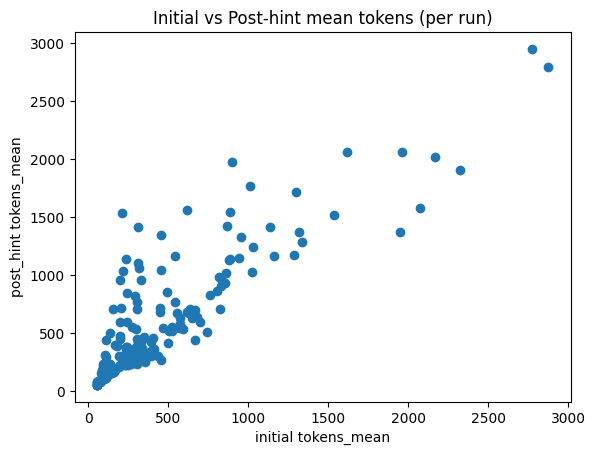

file_type,dataset,model,max_tokens,initial,hints,post_hint,post_over_initial
122,asdiv,Qwen2.5-Math-7B-instruct,2048,214.265447,1140.444444,1531.111111,7.145861
210,sports,Qwen2.5-Math-7B-instruct,2048,236.910020,726.099537,1135.263889,4.791962
121,asdiv,Qwen2.5-Math-7B-instruct,1536,216.661888,847.068966,1031.413793,4.760476
117,asdiv,Qwen2.5-Math-1.5B-instruct,2048,201.804745,473.505618,955.022472,4.732408
107,asdiv,Phi-4-mini-instruct,2048,154.405339,33.095238,703.923810,4.558934
165,gsm8k,Qwen2.5-Math-7B-instruct,2048,310.821835,1244.309859,1416.295775,4.556616
105,asdiv,Phi-4-mini-instruct,1024,108.865546,32.517857,437.330357,4.017160
106,asdiv,Phi-4-mini-instruct,1536,135.655462,33.415929,497.168142,3.664933
164,gsm8k,Qwen2.5-Math-7B-instruct,1536,312.583017,983.028986,1102.304348,3.526437
120,asdiv,Qwen2.5-Math-7B-instruct,1024,203.564014,608.368421,715.666667,3.515684


In [9]:
cmp = df2.pivot_table(
    index=["dataset","model","max_tokens"],
    columns="file_type",
    values="tokens_mean",
    aggfunc="first"
).reset_index()

# keep only runs where both exist
cmp = cmp.dropna(subset=["initial","post_hint"])

plt.figure()
plt.scatter(cmp["initial"], cmp["post_hint"])
plt.xlabel("initial tokens_mean")
plt.ylabel("post_hint tokens_mean")
plt.title("Initial vs Post-hint mean tokens (per run)")
plt.show()

# Optional: ratio
cmp["post_over_initial"] = np.where(cmp["initial"] > 0, cmp["post_hint"] / cmp["initial"], np.nan)
cmp.sort_values("post_over_initial", ascending=False).head(20)
